<a href="https://colab.research.google.com/github/taehohoho/LESSON/blob/master/210930_DNN_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tensorflow as tf

tf.__version__

'2.6.0'

In [4]:
tf.test.gpu_device_name()

''

In [8]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (X_test, y_test) = boston_housing.load_data()

In [9]:
print(train_data.shape)
print(X_test.shape)

print(train_targets[:10])
print(y_test[:10])

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]


In [10]:
mean = train_data.mean(axis=0)
std = train_data.std(axis= 0)
train_data = train_data - mean
train_data = train_data / std

X_test = X_test - mean
X_test = X_test / std

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_targets,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((323, 13), (81, 13), (323,), (81,))

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'Regression')
boston.add(layers.Dense(64, activation = 'relu', input_shape= (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

In [14]:
boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

In [15]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid))

Epoch 1/500
323/323 [==============================] - 1s 2ms/step - loss: 178.1933 - mae: 9.9552 - val_loss: 47.0068 - val_mae: 3.9899
Epoch 2/500
323/323 [==============================] - 1s 2ms/step - loss: 25.9044 - mae: 3.5391 - val_loss: 29.6572 - val_mae: 2.9149
Epoch 3/500
323/323 [==============================] - 0s 2ms/step - loss: 19.4728 - mae: 2.9414 - val_loss: 24.4872 - val_mae: 2.7905
Epoch 4/500
323/323 [==============================] - 0s 1ms/step - loss: 16.5894 - mae: 2.6618 - val_loss: 24.8162 - val_mae: 2.9600
Epoch 5/500
323/323 [==============================] - 1s 2ms/step - loss: 14.4257 - mae: 2.5874 - val_loss: 25.4076 - val_mae: 2.9407
Epoch 6/500
323/323 [==============================] - 0s 1ms/step - loss: 14.0011 - mae: 2.4622 - val_loss: 20.6981 - val_mae: 2.7123
Epoch 7/500
323/323 [==============================] - 1s 2ms/step - loss: 12.6035 - mae: 2.3440 - val_loss: 25.7000 - val_mae: 3.1038
Epoch 8/500
323/323 [==============================] -

In [16]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MAE is : ',test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 16.1095 - mae: 2.8378
MAE is :  2.837841749191284


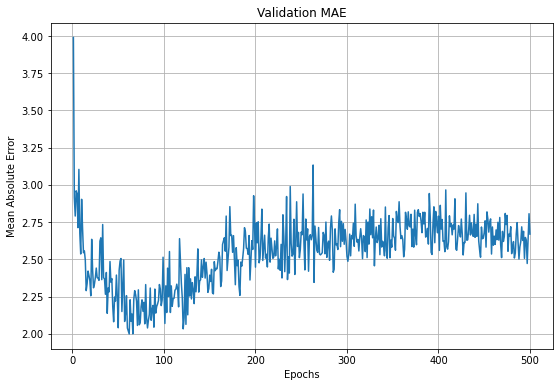

In [22]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_boston.history['val_mae'])+1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_boston.history['val_mae'])
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

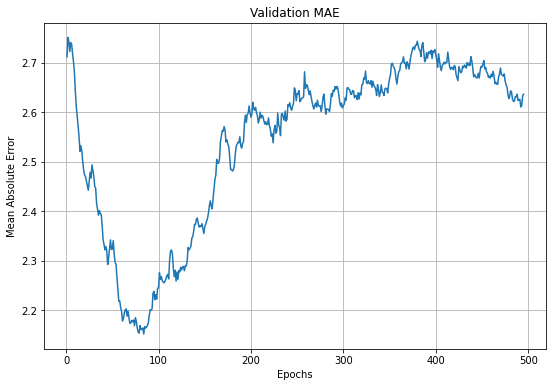

In [26]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 -factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

mae_history = Hist_boston.history['val_mae']

mae_history = smooth_curve(mae_history[5:])

plt.figure(figsize = (9,6))
plt.plot(range(1, len(mae_history)+1), mae_history)
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

In [28]:
from tensorflow.keras import backend as K

K.clear_session()

In [30]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'EarlyStopping')
boston.add(layers.Dense(64, activation = 'relu', input_shape= (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_mae',
                   mode = 'min',
                   patience = 50,
                   verbose = 1)

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_boston.h5',
                     monitor = 'val_mae',
                     mode = 'min',
                     save_best_only = True,
                     verbose = 1)

In [34]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid),
                         callbacks = [es, mc],
                         verbose = 1)

Epoch 1/500
323/323 [==============================] - 1s 2ms/step - loss: 190.3516 - mae: 10.2998 - val_loss: 46.6031 - val_mae: 4.3447

Epoch 00001: val_mae improved from inf to 4.34475, saving model to best_boston.h5
Epoch 2/500
323/323 [==============================] - 0s 2ms/step - loss: 24.2211 - mae: 3.5812 - val_loss: 27.0165 - val_mae: 3.1157

Epoch 00002: val_mae improved from 4.34475 to 3.11573, saving model to best_boston.h5
Epoch 3/500
323/323 [==============================] - 1s 2ms/step - loss: 18.5497 - mae: 3.0178 - val_loss: 28.4802 - val_mae: 3.1281

Epoch 00003: val_mae did not improve from 3.11573
Epoch 4/500
323/323 [==============================] - 1s 2ms/step - loss: 16.1753 - mae: 2.7635 - val_loss: 21.7384 - val_mae: 2.7096

Epoch 00004: val_mae improved from 3.11573 to 2.70964, saving model to best_boston.h5
Epoch 5/500
323/323 [==============================] - 0s 2ms/step - loss: 14.2783 - mae: 2.6295 - val_loss: 18.9718 - val_mae: 2.6087

Epoch 00005: v

In [37]:
!ls -l

total 76
-rw-r--r-- 1 root root 70280 Sep 30 02:43 best_boston.h5
drwxr-xr-x 1 root root  4096 Sep 16 13:40 sample_data


In [38]:
from tensorflow.keras.models import load_model
best_boston = load_model('best_boston.h5')

In [39]:
test_mse_score, test_mae_score = best_boston.evaluate(X_test, y_test)
print('MAE is :', test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 15.9188 - mae: 2.3441
MAE is : 2.344080686569214
